## Are Fandango's ratings still skewed?

In 2015, Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He published a [popular article](https://fivethirtyeight.com/features/fandango-movies-ratings/) on it

Since then, Fandango's official promised to fix it. But we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML

We look at 2016 movie rating data to find out if Fandango's ratings are still skewed


In [1]:
import pandas as pd

before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
before.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [3]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [4]:
#narrow down to relevant columns

fandango_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [5]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [6]:
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1].astype('int')
fandango_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [7]:
fandango_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [8]:
fandango_2015 = fandango_before[fandango_before['Year']==2015].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [9]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
fandango_2016 = fandango_after[fandango_after['year']==2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

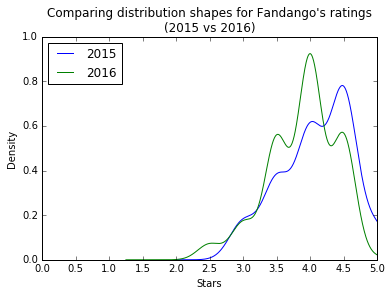

In [11]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend = True)
fandango_2016['fandango'].plot.kde(label='2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)")
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))

plt.show()

It seems like 2016 ratings are lower in general. Could it be that Fandango really did keep to their promise of not inflating ratings anymore. Or it just so happened that 2016 movies were just lousier in general?

We shall look into the 2015 and 2016 distribution of other rating systems 

- Rotten Tomatoes: RT_norm, n_tmeter
- IMDB: IMDB_norm, n_imdb
- Metacritic: Metacritic_norm, n_metascore

In [12]:
all_before = before[['FILM', 'RT_norm', 'IMDB_norm', 'Metacritic_norm']].copy()
all_after = after[['movie', 'year', 'n_tmeter', 'n_imdb', 'n_metascore']].copy()

In [13]:
all_before.head(3)

,FILM,RT_norm,IMDB_norm,Metacritic_norm
0,Avengers: Age of Ultron (2015),3.70,3.90,3.30
1,Cinderella (2015),4.25,3.55,3.35
2,Ant-Man (2015),4.00,3.90,3.20


In [14]:
all_after.head(3)

,movie,year,n_tmeter,n_imdb,n_metascore
0,10 Cloverfield Lane,2016,4.5,3.60,3.80
1,13 Hours,2016,2.5,3.65,2.40
2,A Cure for Wellness,2016,2.0,3.30,2.35


In [15]:
all_before['year'] = all_before['FILM'].str[-5:-1].astype('int')
all_before.head(3)

,FILM,RT_norm,IMDB_norm,Metacritic_norm,year
0,Avengers: Age of Ultron (2015),3.70,3.90,3.30,2015
1,Cinderella (2015),4.25,3.55,3.35,2015
2,Ant-Man (2015),4.00,3.90,3.20,2015


In [16]:
all_before['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [17]:
movie_2015 = all_before[all_before['year']==2015].copy()
movie_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [18]:
all_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [19]:
movie_2016 = all_after[all_after['year']==2016].copy()
movie_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [20]:
movie_2015.head(3)

,FILM,RT_norm,IMDB_norm,Metacritic_norm,year
0,Avengers: Age of Ultron (2015),3.70,3.90,3.30,2015
1,Cinderella (2015),4.25,3.55,3.35,2015
2,Ant-Man (2015),4.00,3.90,3.20,2015


In [21]:
movie_2016.head(3)

,movie,year,n_tmeter,n_imdb,n_metascore
0,10 Cloverfield Lane,2016,4.5,3.60,3.80
1,13 Hours,2016,2.5,3.65,2.40
2,A Cure for Wellness,2016,2.0,3.30,2.35


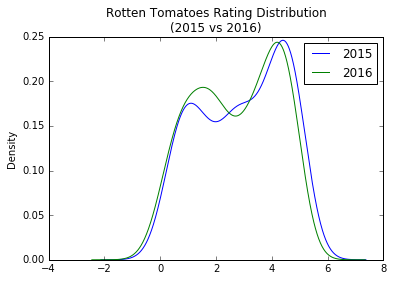

In [22]:
movie_2015['RT_norm'].plot.kde(label='2015', legend=True)
movie_2016['n_tmeter'].plot.kde(label='2016', legend=True)
plt.title('Rotten Tomatoes Rating Distribution\n(2015 vs 2016)')
plt.show()

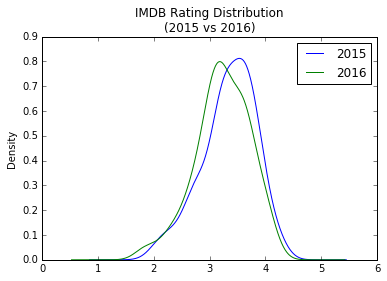

In [23]:
movie_2015['IMDB_norm'].plot.kde(label='2015', legend=True)
movie_2016['n_imdb'].plot.kde(label='2016', legend=True)
plt.title('IMDB Rating Distribution\n(2015 vs 2016)')
plt.show()

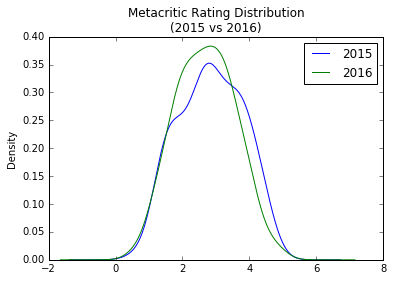

In [24]:
movie_2015['Metacritic_norm'].plot.kde(label='2015', legend=True)
movie_2016['n_metascore'].plot.kde(label='2016', legend=True)
plt.title('Metacritic Rating Distribution\n(2015 vs 2016)')
plt.show()

Seems like across various rating systems, 2016 movies did fare a little worse than 2015. Although not as drastic a drop as Fandango's data showed. So it could be that Fandango did really keep to their promise.

However, the other rating systems' data were normalized to a 0-5 scale. Let's see Fandango's rating data after it's been normalised.

In [25]:
f_2015 = ((fandango_2015['Fandango_Stars'] - fandango_2015['Fandango_Stars'].min())/(fandango_2015['Fandango_Stars'].max() - fandango_2015['Fandango_Stars'].min())) * 5 
f_2016 = ((fandango_2016['fandango'] - fandango_2016['fandango'].min())/(fandango_2016['fandango'].max() - fandango_2016['fandango'].min())) * 5 



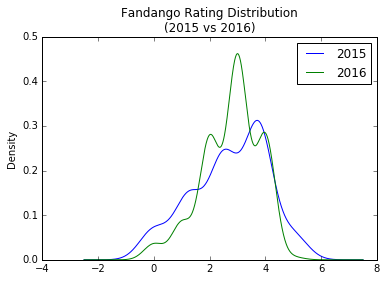

In [26]:
f_2015.plot.kde(label='2015', legend=True)
f_2016.plot.kde(label='2016', legend=True)
plt.title('Fandango Rating Distribution\n(2015 vs 2016)')
plt.show()

Great job, Fandango!